In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv(r"C:\Users\AMAN\Downloads\DATA Scientist\Datasets\healthcare-dataset-stroke-data.csv")

In [6]:
df.head(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


# Exploratory Data Analysis

In [7]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [8]:
df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [9]:
df['bmi'].fillna(int(df['bmi'].mean()),inplace = True)
df.isnull().sum()

C:\Users\AMAN\AppData\Local\Temp\ipykernel_18056\622062109.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['bmi'].fillna(int(df['bmi'].mean()),inplace = True)


id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [10]:
df2 = df.drop('id',axis=1)
df2.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.0,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


# ENCODING

In [11]:
categorical_cols = ['gender','ever_married','work_type','Residence_type','smoking_status']

In [12]:
from sklearn.preprocessing import OrdinalEncoder

In [13]:
oe = OrdinalEncoder()
df2[categorical_cols] = oe.fit_transform(df2[categorical_cols])

In [14]:
df2

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1.0,67.0,0,1,1.0,2.0,1.0,228.69,36.6,1.0,1
1,0.0,61.0,0,0,1.0,3.0,0.0,202.21,28.0,2.0,1
2,1.0,80.0,0,1,1.0,2.0,0.0,105.92,32.5,2.0,1
3,0.0,49.0,0,0,1.0,2.0,1.0,171.23,34.4,3.0,1
4,0.0,79.0,1,0,1.0,3.0,0.0,174.12,24.0,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,0.0,80.0,1,0,1.0,2.0,1.0,83.75,28.0,2.0,0
5106,0.0,81.0,0,0,1.0,3.0,1.0,125.20,40.0,2.0,0
5107,0.0,35.0,0,0,1.0,3.0,0.0,82.99,30.6,2.0,0
5108,1.0,51.0,0,0,1.0,2.0,0.0,166.29,25.6,1.0,0


In [15]:
df2[categorical_cols] = df2[categorical_cols].astype(int)

In [16]:
df2.dtypes

gender                 int64
age                  float64
hypertension           int64
heart_disease          int64
ever_married           int64
work_type              int64
Residence_type         int64
avg_glucose_level    float64
bmi                  float64
smoking_status         int64
stroke                 int64
dtype: object

In [17]:
df2['stroke'].value_counts()

stroke
0    4861
1     249
Name: count, dtype: int64

In [18]:
from sklearn.utils import resample

In [19]:
df_major = df2[(df2['stroke']==0)]
df_minor = df2[(df2['stroke']==1)]
df_minor_resmapled = resample(df_minor,replace=True,n_samples=4861,random_state=42)
df_resampled = pd.concat([df_minor_resmapled,df_major])

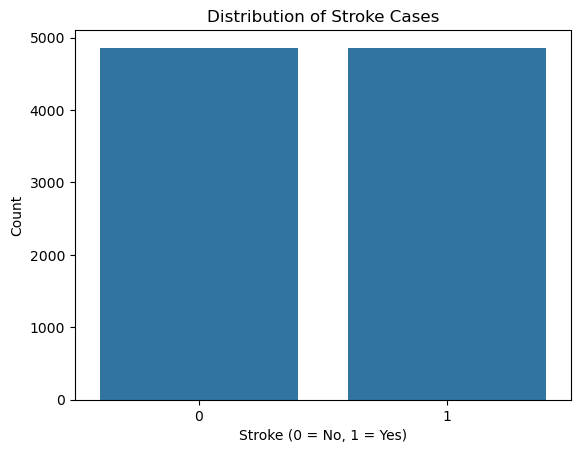

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='stroke', data=df_resampled)
plt.title('Distribution of Stroke Cases')
plt.xlabel('Stroke (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

<Axes: >

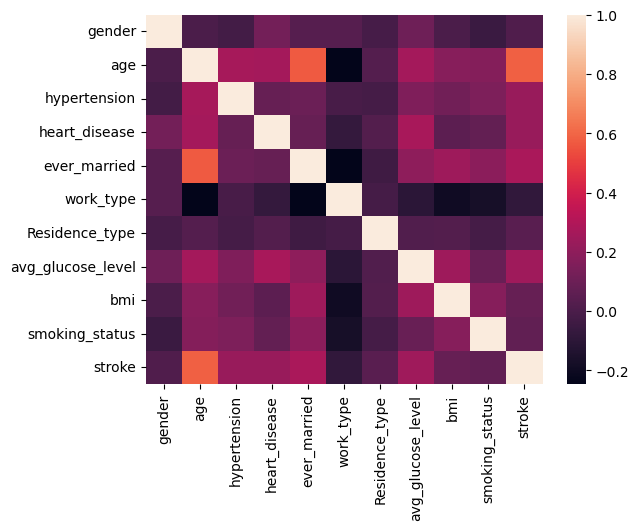

In [21]:
sns.heatmap(df_resampled.corr(), fmt='.2g')


In [22]:
x = df_resampled.iloc[:,:-1]
y = df_resampled['stroke']

In [23]:
from sklearn.model_selection import train_test_split,cross_val_score,cross_val_predict
from sklearn.metrics import accuracy_score
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=7)

# Decision Tree

In [24]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [25]:
print("Accuracy Score :",round(dtc.score(x_test,y_test)*100,2),"%")

Accuracy Score : 96.81 %


# XGBoost

In [26]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [27]:
print("Accuracy Score :",round(xgb.score(x_test,y_test)*100,2),"%")

Accuracy Score : 97.07 %


# Random Forest

In [28]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [29]:
print("Accuracy Score :",round(rfc.score(x_test,y_test)*100,2),"%")

Accuracy Score : 98.82 %


# Logistic Regression

In [30]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)

C:\Users\AMAN\miniconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [31]:
print("Accuracy Score :",round(lr.score(x_test,y_test)*100,2),"%")

Accuracy Score : 76.5 %


In [32]:
#importing classification report and confusion Matrix
from sklearn.metrics import classification_report, confusion_matrix

# XGBoost

In [33]:
y_pred = xgb.predict(x_test)
print("Classification Report", classification_report(y_test,y_pred))

Classification Report               precision    recall  f1-score   support

           0       1.00      0.94      0.97       988
           1       0.94      1.00      0.97       957

    accuracy                           0.97      1945
   macro avg       0.97      0.97      0.97      1945
weighted avg       0.97      0.97      0.97      1945



Text(0.5, 1.0, 'Accuracy Score: 0.970694087403599')

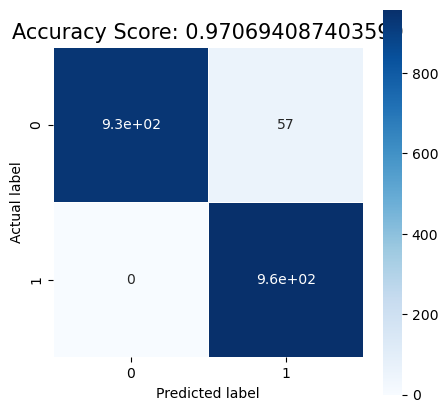

In [34]:
cm = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5,annot=True,square=True,cmap='Blues')
plt.xlabel("Predicted label")
plt.ylabel("Actual label")
sample_title = 'Accuracy Score: {0}'.format(xgb.score(x_test,y_test))
plt.title(sample_title,size=15)

[0]	validation_0-error:0.16703	validation_0-logloss:0.56057	validation_1-error:0.17481	validation_1-logloss:0.56337
[1]	validation_0-error:0.13720	validation_0-logloss:0.47580	validation_1-error:0.15784	validation_1-logloss:0.48586
[2]	validation_0-error:0.12408	validation_0-logloss:0.41824	validation_1-error:0.14190	validation_1-logloss:0.43022
[3]	validation_0-error:0.11328	validation_0-logloss:0.38150	validation_1-error:0.13265	validation_1-logloss:0.39625
[4]	validation_0-error:0.10390	validation_0-logloss:0.35381	validation_1-error:0.12596	validation_1-logloss:0.36730
[5]	validation_0-error:0.10197	validation_0-logloss:0.33516	validation_1-error:0.12082	validation_1-logloss:0.35037
[6]	validation_0-error:0.09798	validation_0-logloss:0.31302	validation_1-error:0.11774	validation_1-logloss:0.33135
[7]	validation_0-error:0.09194	validation_0-logloss:0.29977	validation_1-error:0.11208	validation_1-logloss:0.31756
[8]	validation_0-error:0.09117	validation_0-logloss:0.29172	validation_1

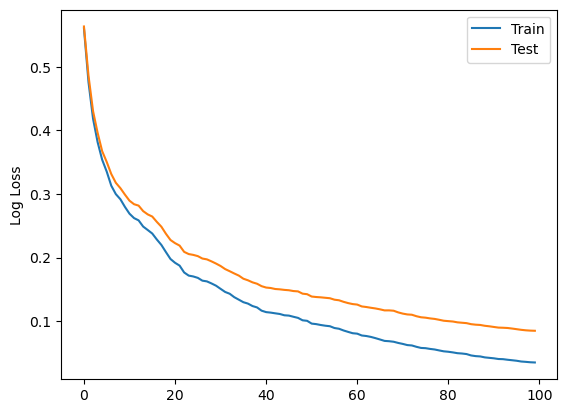

In [35]:
model = XGBClassifier(eval_metric=['error','logloss'])
eval_set = [(x_train,y_train),(x_test,y_test)]
model.fit(x_train,y_train,eval_set=eval_set,verbose=True)
results = model.evals_result()
epochs = len(results['validation_0']['error'])
x_axis = range(0,epochs)
# plot Log Loss
fig,ax = plt.subplots()
ax.plot(x_axis,results['validation_0']['logloss'],label = 'Train')
ax.plot(x_axis,results['validation_1']['logloss'],label = 'Test')
ax.legend()
plt.ylabel('Log Loss')
plt.show()


In [36]:
model = XGBClassifier(eval_metric="logloss",early_stopping_rounds=10)
eval_set = [(x_test, y_test)]
model.fit(x_train,y_train, eval_set=eval_set, verbose=True)
     

[0]	validation_0-logloss:0.56337
[1]	validation_0-logloss:0.48586
[2]	validation_0-logloss:0.43022
[3]	validation_0-logloss:0.39625
[4]	validation_0-logloss:0.36730
[5]	validation_0-logloss:0.35037
[6]	validation_0-logloss:0.33135
[7]	validation_0-logloss:0.31756
[8]	validation_0-logloss:0.30916
[9]	validation_0-logloss:0.29897
[10]	validation_0-logloss:0.28944
[11]	validation_0-logloss:0.28391
[12]	validation_0-logloss:0.28167
[13]	validation_0-logloss:0.27305
[14]	validation_0-logloss:0.26790
[15]	validation_0-logloss:0.26450
[16]	validation_0-logloss:0.25613
[17]	validation_0-logloss:0.24851
[18]	validation_0-logloss:0.23742
[19]	validation_0-logloss:0.22763
[20]	validation_0-logloss:0.22270
[21]	validation_0-logloss:0.21883
[22]	validation_0-logloss:0.20897
[23]	validation_0-logloss:0.20551
[24]	validation_0-logloss:0.20422
[25]	validation_0-logloss:0.20228
[26]	validation_0-logloss:0.19848
[27]	validation_0-logloss:0.19717
[28]	validation_0-logloss:0.19403
[29]	validation_0-loglos

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=10,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [37]:
from xgboost import plot_importance

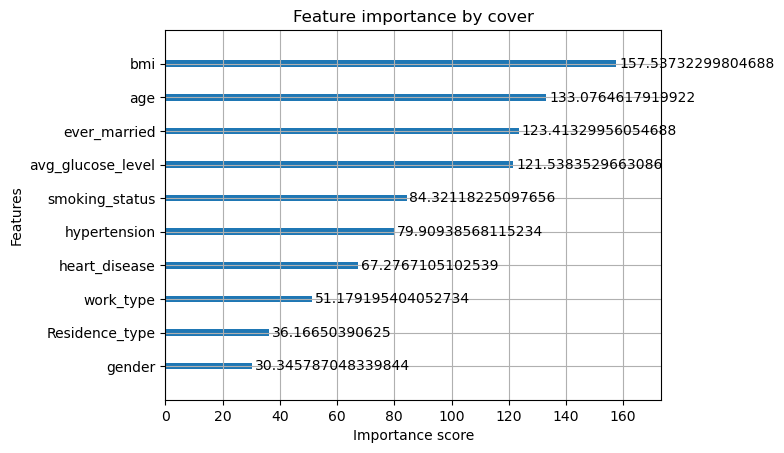

In [38]:
plot_importance(model,importance_type='cover')
plt.title("Feature importance by cover")
plt.show()

# Logistic Regression

In [39]:
y_pred = lr.predict(x_test)
print("Classification report - \n",classification_report(y_test,y_pred))

Classification report - 
               precision    recall  f1-score   support

           0       0.79      0.74      0.76       988
           1       0.75      0.79      0.77       957

    accuracy                           0.77      1945
   macro avg       0.77      0.77      0.76      1945
weighted avg       0.77      0.77      0.76      1945



Text(0.5, 1.0, 'Accuracy Score: 76.5038560411311')

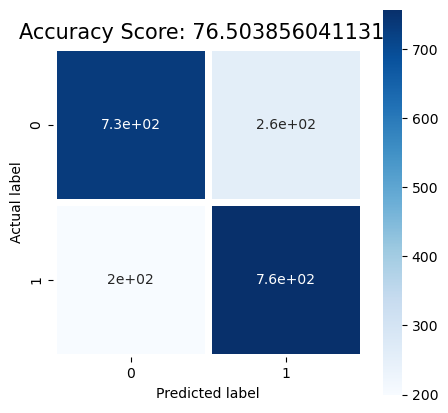

In [40]:
cm = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=5, annot=True,square=True,cmap='Blues')
plt.xlabel("Predicted label")
plt.ylabel("Actual label")
all_sample_title = 'Accuracy Score: {0}'.format(lr.score(x_test,y_test)*100)
plt.title(all_sample_title,size = 15)

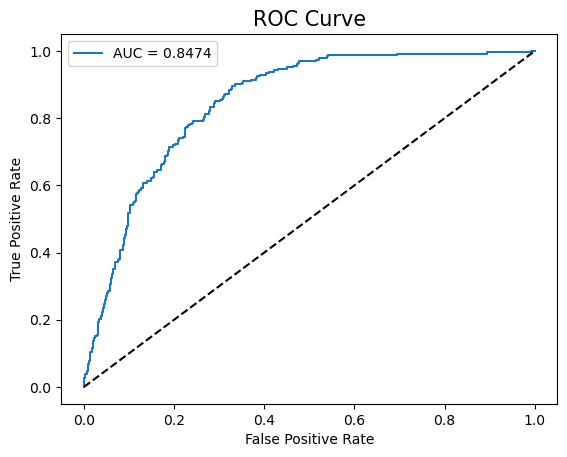

In [41]:
from sklearn.metrics import roc_curve,roc_auc_score
y_pred_proba = lr.predict_proba(x_test)[:][:,1]
df_actual_predicted  = pd.concat([pd.DataFrame(np.array(y_test),columns=["y_actual"]),pd.DataFrame(y_pred_proba,columns=['y_pred_proba'])],axis=1)
df_actual_predicted.index = y_test.index
fpr,tpr,tr = roc_curve(df_actual_predicted['y_actual'],df_actual_predicted['y_pred_proba'])
auc = roc_auc_score(df_actual_predicted['y_actual'],df_actual_predicted['y_pred_proba'])
plt.plot(fpr,tpr,label='AUC = %0.4f' % float(auc))
plt.plot(fpr,fpr,linestyle='--',color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC Curve",size=15)
plt.legend()

In [42]:
y_pred_prob = lr.predict_proba(x_test)[0:10]
y_pred_prob_df = pd.DataFrame(data = y_pred_prob*100,columns=['Prob. of dont have Stroke','Prob. of having Stroke']).round(2)
y_pred_prob_df

,Prob. of dont have Stroke,Prob. of having Stroke
0,62.94,37.06
1,90.08,9.92
2,15.98,84.02
3,46.72,53.28
4,97.27,2.73
5,68.02,31.98
6,45.08,54.92
7,32.45,67.55
8,44.84,55.16
9,86.46,13.54


C:\Users\AMAN\AppData\Local\Temp\ipykernel_18056\447361539.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y_pred1, shade=True, color="purple")


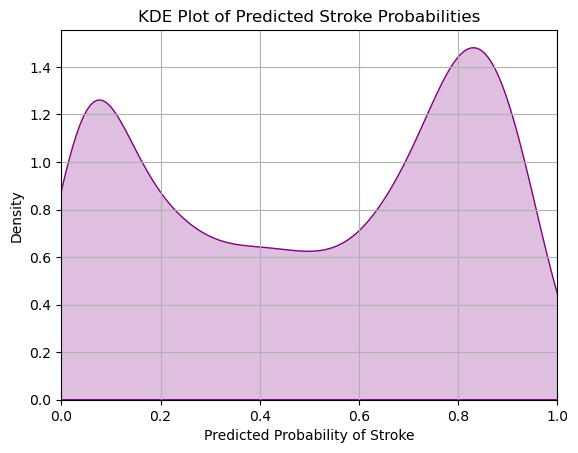

In [43]:
y_pred1 = lr.predict_proba(x_test)[:,1]
sns.kdeplot(y_pred1, shade=True, color="purple")
plt.title('KDE Plot of Predicted Stroke Probabilities')
plt.xlabel('Predicted Probability of Stroke')
plt.ylabel('Density')
plt.xlim(0, 1)
plt.grid(True)
plt.show()


# Predicting Stroke by Inputing Number

In [44]:
Xnew = [[1, 50, 0, 1, 0, 3, 1, 140, 25, 2]]
y_pred_prob2 = lr.predict_proba(Xnew)
y_pred_prob_df2 = pd.DataFrame(data=y_pred_prob2, columns=['Prob of dont have stroke', 'Prob of have stroke'])
y_pred_prob_df2

C:\Users\AMAN\miniconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


,Prob of dont have stroke,Prob of have stroke
0,0.35033,0.64967


# Random Forest

In [45]:
y_pred = rfc.predict(x_test)
print('Classification Report- \n',classification_report(y_test,y_pred))

Classification Report- 
               precision    recall  f1-score   support

           0       1.00      0.98      0.99       988
           1       0.98      1.00      0.99       957

    accuracy                           0.99      1945
   macro avg       0.99      0.99      0.99      1945
weighted avg       0.99      0.99      0.99      1945



Text(0.5, 1.0, 'Accuracy Score 98.81748071979435')

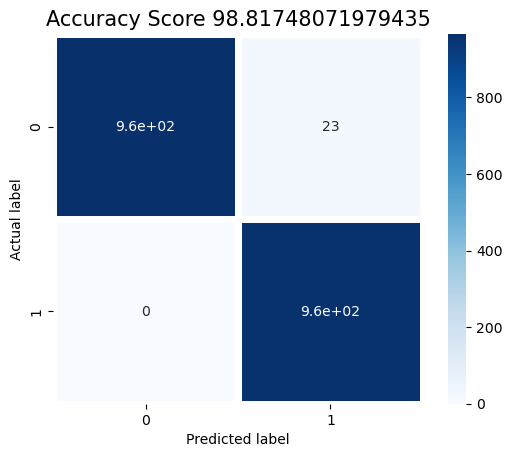

In [46]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(data=cm,linewidths=5,annot=True,square=True,cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('Actual label')
all_sample_title = 'Accuracy Score {0}'.format(rfc.score(x_test,y_test)*100)
plt.title(all_sample_title,size=15)                           

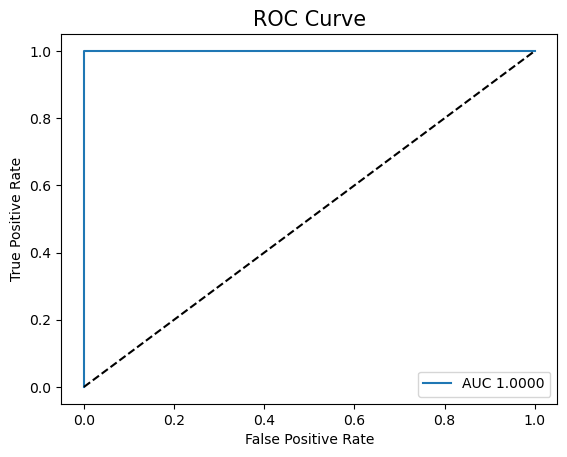

In [47]:
# already imported roc_curve,roc_auc_score
y_pred_prob = rfc.predict_proba(x_test)[:][:,1]
df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test),columns=["y_actual"]),pd.DataFrame(np.array(y_pred_prob),columns=['y_pred_prob'])],axis=1)
df_actual_predicted.index = y_test.index
fpr,tpr,tr = roc_curve(df_actual_predicted['y_actual'],df_actual_predicted['y_pred_prob'])
auc = roc_auc_score(df_actual_predicted['y_actual'],df_actual_predicted['y_pred_prob'])
plt.plot(fpr,tpr, label='AUC %0.4f' %auc)
plt.plot(fpr,fpr,linestyle='--',color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC Curve",size=15)
plt.legend()

In [48]:
# Feature Importance
imp_df = pd.DataFrame({
    'Feature Name': x_train.columns,
    'Importance': rfc.feature_importances_
})
imp_df.sort_values(by='Importance',ascending=False)

,Feature Name,Importance
1,age,0.392015
7,avg_glucose_level,0.203701
8,bmi,0.181189
9,smoking_status,0.053940
5,work_type,0.052421
4,ever_married,0.028206
2,hypertension,0.026398
0,gender,0.022803
6,Residence_type,0.020625
3,heart_disease,0.018700


In [49]:
y_pred_prob = rfc.predict_proba(x_test)[0:10]
y_pred_prob_df = pd.DataFrame(data=y_pred_prob*100, columns=['Prob of dont have stroke', 'Prob of have stroke']).round(2)
y_pred_prob_df

,Prob of dont have stroke,Prob of have stroke
0,95.0,5.0
1,100.0,0.0
2,0.0,100.0
3,96.0,4.0
4,100.0,0.0
5,100.0,0.0
6,94.0,6.0
7,90.0,10.0
8,0.0,100.0
9,100.0,0.0


C:\Users\AMAN\AppData\Local\Temp\ipykernel_18056\3790121370.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y_pred1, shade=True, color="purple")


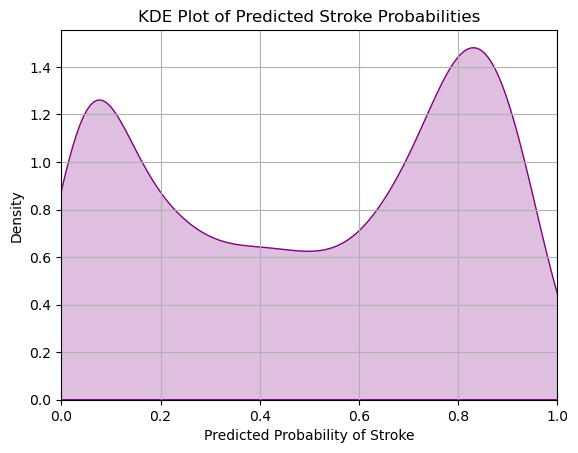

In [50]:
y_pred2 = rfc.predict_proba(x_test)[:,1]
sns.kdeplot(y_pred1, shade=True, color="purple")
plt.title('KDE Plot of Predicted Stroke Probabilities')
plt.xlabel('Predicted Probability of Stroke')
plt.ylabel('Density')
plt.xlim(0, 1)
plt.grid(True)
plt.show()


# Predicting Stroke by Inputing Number

In [51]:
Xnew2 = [[29,48,69,23,4,8,2,7,106,45]]
y_pred_prob3 = rfc.predict_proba(Xnew2)
y_pred_prob3_df = pd.DataFrame(data=y_pred_prob3*100,columns=['Prob. of dont have Stroke','Prob of have Stroke'])
y_pred_prob3_df

C:\Users\AMAN\miniconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


,Prob. of dont have Stroke,Prob of have Stroke
0,84.0,16.0


# HYPERPARAMETER TUNING

In [58]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
}

grid = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='accuracy')
grid.fit(x_train, y_train)
grid.best_params_


{'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 100}

# BEST SCORE AFTER TUNING IS

In [65]:
print("Accuracy Score is: ",(grid.best_score_*100).round(2))

Accuracy Score is:  98.96


In [66]:
gender = input("Your Gender (0=Female, 1=Male) : ")
age = input("Your Age: ")
hypertension = input("Do you have hypertension ? (0 = No, 1 = Yes) : ")
heart = input("Do you have heart disease ? (0 = No, 1 = Yes) :")
marry = input("Did you ever married ? (0 = No, 1 = Yes) :")
work = input("Your Worktype ? (0 = children, 1 = Government job, 2 = Never worked, 3 = Private, 4 = Self Employed) : ")
residence = input("Your Residence type ? (0 = Rural, 1 = Urban) : ")
avg = input("Average Glucose Level : ")
bmi = input("Your BMI : ")
smoke = input("Your Smoking status ? (0 = never smoked, 1 = formerly smoked, 2 = smokes, 3 = unknown) : ")

Xnew3 = [[gender, age, hypertension, heart, marry, work, residence, avg,bmi,smoke]]


y_pred_prob4 = grid.predict_proba(Xnew3)
y_pred_prob_df4 = pd.DataFrame(data=y_pred_prob4*100, columns=['Prob of dont have stroke', 'Prob of have stroke'])
y_pred_prob_df4

Your Gender (0=Female, 1=Male) :  1
Your Age:  20
Do you have hypertension ? (0 = No, 1 = Yes) :  1
Do you have heart disease ? (0 = No, 1 = Yes) : 0
Did you ever married ? (0 = No, 1 = Yes) : 0
Your Worktype ? (0 = children, 1 = Government job, 2 = Never worked, 3 = Private, 4 = Self Employed) :  3
Your Residence type ? (0 = Rural, 1 = Urban) :  1
Average Glucose Level :  110
Your BMI :  45
Your Smoking status ? (0 = never smoked, 1 = formerly smoked, 2 = smokes, 3 = unknown) :  0


C:\Users\AMAN\miniconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


,Prob of dont have stroke,Prob of have stroke
0,97.0,3.0


In [67]:
import joblib

# Save it
joblib.dump(rfc, 'stroke_model.pkl')

# Later or in another file/notebook
rfc_loaded = joblib.load('stroke_model.pkl')

# Predict with the loaded model
y_pred = rfc_loaded.predict(x_test)
